In [3]:
#need this to open an excel
pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

file_path = r"C:\Users\12039\Documents\DATA 6520\Customer-Segmentation\Online Retail.xlsx"
onlineretail = pd.read_excel(file_path)
onlineretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Clean Data

#### Handle Missing Data:
- Check for missing values in crucial columns like customer IDs, transaction dates, and purchase amounts.
- Decide on a strategy for dealing with them, such as filling in missing values or removing rows/columns with too many missing values.

#### Remove Duplicates:
- Look for and eliminate duplicate records to ensure the accuracy of your analysis.

#### Filter Out Irrelevant Data:
- Depending on your analysis, you might need to exclude certain types of transactions (like returns or free samples).

#### Data Type Conversions:
- Ensure that each column is of the appropriate data type. For instance, dates should be in a datetime format, customer IDs might be strings, and monetary values should be numeric.

#### Data Range Consistency:
- Check for any anomalies or inconsistencies in data ranges, such as dates in the future or negative monetary values.

#### Creating RFM Metrics:
- Recency: Calculate the number of days since the last purchase for each customer.
- Frequency: Count the number of purchases for each customer.
- Monetary: Calculate the total amount of money each customer has spent.

#### Handling Outliers:
- Look for outliers in your RFM metrics which can skew your analysis. Depending on your dataset and goals, you might want to cap them, remove them, or treat them separately.

#### Normalization or Standardization (If Required):
- Depending on your segmentation method (like K-means clustering), you might need to normalize or standardize the RFM metrics so they're on the same scale.

In [6]:
onlineretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
# remove missing CustomerID rows since RFM is all about the customer.
onlineretail_cleaned = onlineretail.dropna(subset=['CustomerID']).copy()
onlineretail_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [10]:
onlinceretail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
# Change CustomerID to integer instead of float.  
# This will help with memory but mostly avoid ambiguity and data integrity later
onlineretail_cleaned['CustomerID'] = onlineretail_cleaned['CustomerID'].astype(int)

In [17]:
onlineretail_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
#Filter our negative or zero values
#There is at least 1 negative quantity and 0 for unit price and quanitity
onlineretail_cleaned = onlineretail_cleaned[(onlineretail_cleaned['Quantity'] > 0) & (onlineretail_cleaned['UnitPrice'] > 0)]

In [19]:
onlineretail_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
onlineretail_cleaned.sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom
407634,571904,16045,POPART WOODEN PENCILS ASST,100,2011-10-19 14:41:00,0.040,12522,Germany
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.950,15502,United Kingdom
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.320,12744,Singapore
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.060,12536,France
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.060,12536,France


In [22]:
# Create total price column & remove duplicates
onlineretail_cleaned['TotalPrice'] = onlineretail_cleaned['Quantity'] * onlineretail_cleaned['UnitPrice']
onlineretail_cleaned = onlineretail_cleaned.drop_duplicates()

#### Now recheck summary stats

In [23]:
onlineretail_cleaned.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,22.631500
std,180.492832,22.241836,1713.539549,311.099224
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
# Get rid of the outliers so I can actually visualize the data

In [28]:
Q1 = onlineretail_cleaned['Quantity'].quantile(0.25)
Q3 = onlineretail_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
onlineretail_filtered = onlineretail_cleaned[(onlineretail_cleaned['Quantity'] >= (Q1 - 1.5 * IQR)) & 
                                             (onlineretail_cleaned['Quantity'] <= (Q3 + 1.5 * IQR))]


In [29]:
onlineretail_filtered.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,367076.000000,367076.000000,367076.000000,367076.000000
mean,7.094719,3.240009,15302.780408,14.510876
std,6.670837,22.972315,1712.040348,28.229733
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13975.000000,4.250000
50%,4.000000,1.950000,15182.000000,10.500000
75%,12.000000,3.750000,16807.000000,17.700000
max,27.000000,8142.750000,18287.000000,8142.750000


<AxesSubplot: ylabel='Frequency'>

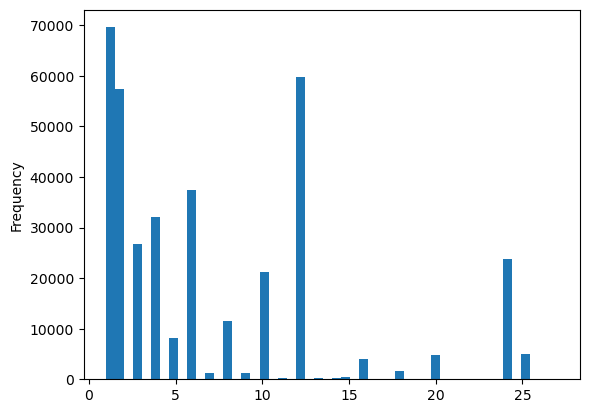

In [32]:
onlineretail_filtered['Quantity'].plot(kind='hist', bins=50)

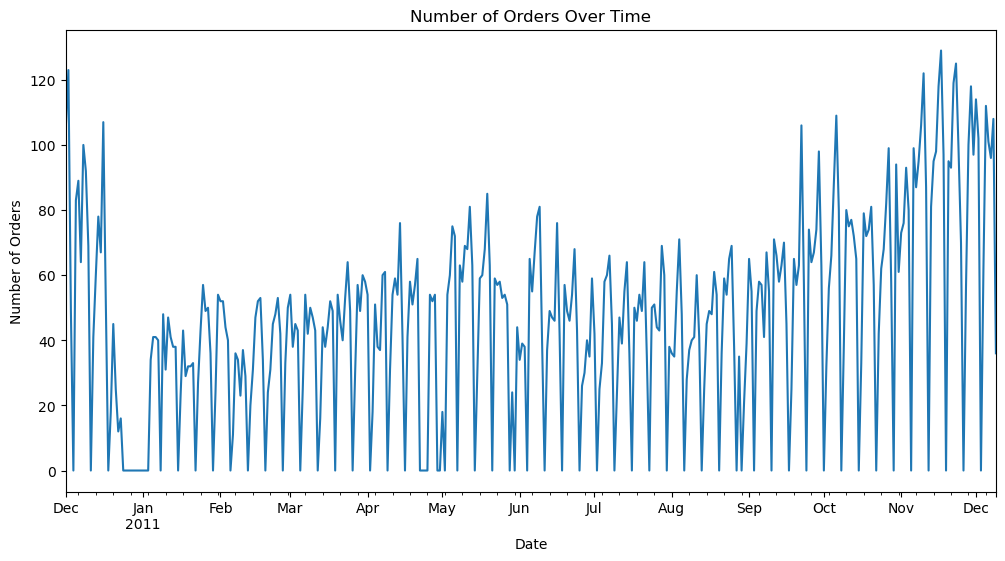

In [36]:
import matplotlib.pyplot as plt

# Resampling to a daily frequency
daily_orders = onlineretail_filtered.resample('D', on='InvoiceDate').InvoiceNo.nunique()

# Plotting
plt.figure(figsize=(12, 6))
daily_orders.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

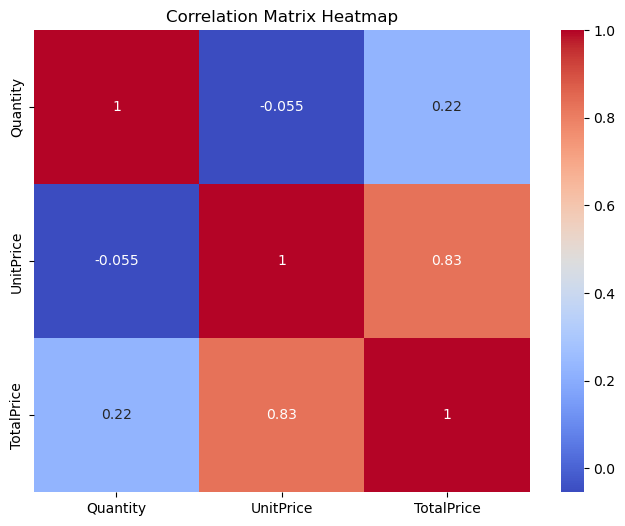

In [38]:
import seaborn as sns

# Calculate the correlation matrix
corr = onlineretail_filtered[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


<AxesSubplot: >

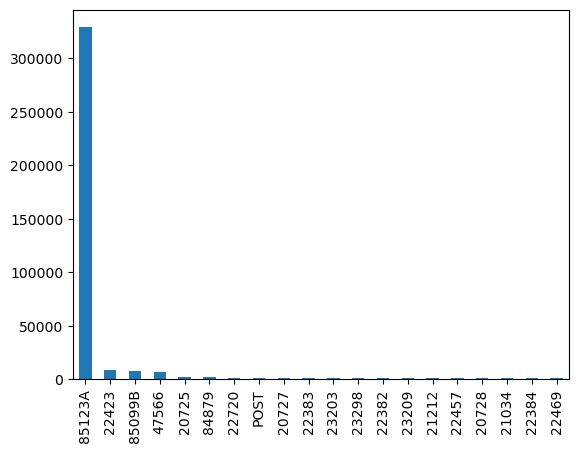

In [39]:
# For Country
onlineretail_filtered['Country'].value_counts().plot(kind='bar')

# For StockCode
onlineretail_filtered['StockCode'].value_counts().head(20).plot(kind='bar')  # Top 20 stock codes


In [40]:
customer_data = onlineretail_cleaned.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': ['mean', 'sum']
}).rename(columns={'nunique': 'TotalOrders', 'mean': 'AverageOrderValue', 'sum': 'TotalSpend'})


In [41]:
customer_data

InvoiceNo        TotalPrice           
           TotalOrders AverageOrderValue TotalSpend
CustomerID                                         
12346                1      77183.600000   77183.60
12347                7         23.681319    4310.00
12348                4         57.975484    1797.24
12349                1         24.076027    1757.55
12350                1         19.670588     334.40
...                ...               ...        ...
18280                1         18.060000     180.60
18281                1         11.545714      80.82
18282                2         14.837500     178.05
18283               16          2.837074    2045.53
18287                3         26.246857    1837.28

[4338 rows x 3 columns]